In [76]:
# import dependencies
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data Preparation

In [77]:
# read in data from crypto_data.csv
crypto_df = pd.read_csv('Resources/crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [78]:
# Filter for currencies that are currently being traded
isTrading_df = crypto_df[crypto_df['IsTrading'] == True]
isTrading_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [79]:
# Drop the `IsTrading` and 'Unnamed: 0' column from the dataframe
isTrading_df = isTrading_df.drop('IsTrading', 1).drop('Unnamed: 0', 1)
isTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1243,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,SHA-256,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [80]:
# determine number of null values in dataframe
isTrading_df.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [81]:
# Remove all rows that have at least one null value
isTrading_df = isTrading_df.dropna()
isTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [82]:
# Find duplicate entries
print(f"Duplicate entries: {isTrading_df.duplicated().sum()}")

Duplicate entries: 0


In [83]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
isTrading_df = isTrading_df[isTrading_df['TotalCoinsMined'] > 0]
isTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [84]:
# For our dataset to be comprehensible to a machine learning algorithm, its data should be numeric
# Since the coin names do not contribute to the analysis of the data, save & delete the `CoinName` from the original df
CoinName = pd.DataFrame(isTrading_df['CoinName']).reset_index(drop=True)
CoinName

isTrading_df = isTrading_df.drop('CoinName', 1)
isTrading_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [85]:
# Convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data
encodedColumns = ['Algorithm', 'ProofType']
for column in encodedColumns:
    encoder = LabelEncoder()
    isTrading_df[column] = encoder.fit_transform(isTrading_df[column].values)
isTrading_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,52,15,4.199995e+01,42
2,52,15,1.055185e+09,532000000
5,66,15,2.927942e+10,314159265359
7,47,12,1.792718e+07,21000000
8,20,12,1.076842e+08,0
...,...,...,...,...
1238,47,1,2.000000e+09,2000000000
1242,52,15,1.493105e+07,250000000
1245,10,12,9.802226e+08,1400222610
1246,18,12,7.296538e+06,21000000


In [86]:
# Standardize our dataset using StandardScaler() 
# so that columns that contain larger values do not unduly influence the outcome
scaler = StandardScaler()
scaled_isTrading = scaler.fit_transform(isTrading_df)
print(scaled_isTrading[0:5])

[[ 3.76459118e-01  8.91356555e-01 -1.17108170e-01 -1.52870298e-01]
 [ 3.76459118e-01  8.91356555e-01 -9.39695522e-02 -1.45008997e-01]
 [ 1.21543803e+00  8.91356555e-01  5.24945609e-01  4.48942416e+00]
 [ 7.68237937e-02  1.67233875e-03 -1.16715055e-01 -1.52559984e-01]
 [-1.54120696e+00  1.67233875e-03 -1.14746818e-01 -1.52870298e-01]]


# Dimensionality Reduction with PCA

In [87]:
# Dimensionality reduction with PCA
# Preserving 90% of the explained variance in dimensionality reduction
# why ? --> easier to plug into machine learning model, thus making it faster and easier to visualize

# Initialize PCA model
pca = PCA(n_components=0.90)

# Obtaining principal components of the data 
crypto_pca = pca.fit_transform(scaled_isTrading)

In [89]:
# Fetch the explained variance
print(f"The explained variance is {pca.explained_variance_ratio_}")

The explained variance is [0.4350467  0.28670411 0.20538956]


In [90]:
# further reduce the dataset dimensions with t-SNE and visually inspect the results
# Run t-SNE on the principal components: the output of the PCA transformation. 

# Initialize t-SNE model
tsne = TSNE(learning_rate = 100)

# Reduce dimensions, with t-SNE features are reduced to two.
transformed_crypto = tsne.fit_transform(crypto_pca)
transformed_crypto.shape

(532, 2)

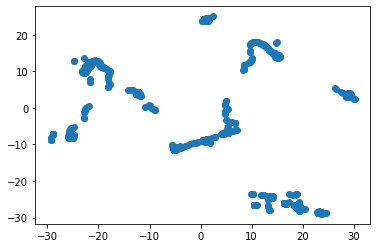

In [91]:
# Create scatter plot from t-SNE data

# The first column of transformed features
x = transformed_crypto[:,0]

# The second column of transformed features
y = transformed_crypto[:,1]
plt.scatter(x, y)
plt.show()

# Cluster Analysis with k-Means

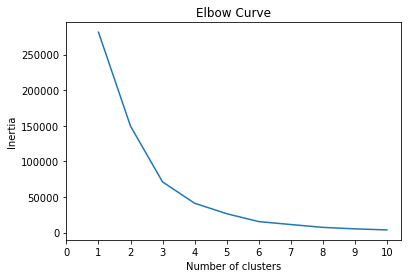

In [92]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_crypto)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

# Creating elbow plot
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Recommendations

### Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters? 

* By analyzing the above elbow curve, I think the cryptocurrencies can be clustered together. It seems the optimal number of clusters for this case is 4 as this is where the "elbow" appears on our scatter plot.  
* Below, I'll visualize the best values of k found from our cluster analysis. 

# Analyzing Clusters with the Best Value of `k`

In [93]:
# create dataframe of data with reduced dimensions
transformed_crypto_df = pd.DataFrame(data = transformed_crypto,
                                    columns = ["principal component 1", "principal component 2"]).reset_index(drop=True)
transformed_crypto_df

,principal component 1,principal component 2
0,-23.064980,9.694702
1,-17.902527,10.158098
2,4.764570,0.951487
3,0.751120,24.410658
4,0.526634,-8.788192
...,...,...
527,13.431907,-27.871401
528,-20.220451,12.384791
529,5.097172,-6.314494
530,1.313600,-8.438798


In [102]:
# Predicting clusters with k = 4

# Initialize the k-means model
model = KMeans(n_clusters = 4, random_state=0)

# Fit the model
model.fit(transformed_crypto)

# Predict clusters
predictions = model.predict(transformed_crypto)

# Add the predicted class column to the dataframe
transformed_crypto_df["class"] = model.labels_
transformed_crypto_df.head()

,principal component 1,principal component 2,class
0,-23.064980,9.694702,0
1,-17.902527,10.158098,0
2,4.764570,0.951487,1
3,0.751120,24.410658,3
4,0.526634,-8.788192,1


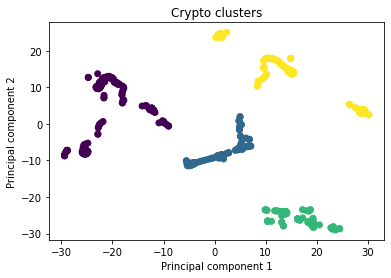

In [103]:
# Visualize the clusters
plt.scatter(x = transformed_crypto_df['principal component 1'], y = transformed_crypto_df['principal component 2'], 
            c = transformed_crypto_df['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Crypto clusters')
plt.show()